# COGS 108 - Final Project 

***

# Overview

We are analyzing data on unemployment rates, to summarize the state of the economy, and numbers of students in given majors. We will be comparing these data sets to determine if unemployment rates influence major selection.  We have narrowed the analysis of majors down to what we thought were 6 representative majors. Three representing STEM oriented majors, and three representing Liberal Arts majors. Our analysis has shown that there is a weak correlation between major choices and unemployment rate. There are a few factors that we feel would be important to consider for further/future studies. The majors selected may not have been the best representative majors. We would ideally like to look at numbers of people applying to the selected majors, rather than actual enrollment. We think the data does show that there may be a slightly delayed response between unemployment and major enrollment.

***

# Names

- Carolyn Sanford
- Tuong Tang
- Danielle Zusman
- Thomas Dailey
- Jiaao Mo

***

# Group Members IDs

- A14737810
- A14702369
- A13847129
- A15716898
- A15724489

***

# Research Question

- Which majors are becoming most popular - country wide? 

- What does major popularity say about the state of the economy?

- Does earning potential of a field influence major popularity?

***

# Background and Prior Work

As a group of students about to enter the workforce, we were interested in learning more about how our decisions and perceptions of undergraduate degrees measure up to others who have gone through the same process. We are students with diverse backgrounds, but similar majors, and thought we could learn a lot about what motivates people, and how trends change over time. We believe this is important because it is relevant to our lives, and allows us to highlight the disparities in income based on societal norms concerning the value of certain professions. 

We looked at projects that have attempted to answer similar questions. The Hamilton Project found that having a degree significantly increases earning potential, and that majors that “emphasize quantitative skills” tend to reach the highest earnings (Brad). Forbes looked at the same question, but came to a slightly different conclusion. They argued that there is an intersection between passion and purpose when choosing your career that goes beyond potential income (Morrison). We were curious to determine whether earning potential would dictate the popularity of majors, and whether the economic state would further persuade students towards higher earning fields.


References (include links):

- Brad, Hershbein, and Melissa S. Kearney. “Major Decisions: What Graduates Earn Over Their Lifetimes.” Major Decisions: What Graduates Earn Over Their Lifetimes | The Hamilton Project, 23 Oct. 2019, www.hamiltonproject.org/papers/major_decisions_what_graduates_earn_over_their_lifetimes.

- Morrison, Nick. “The Surprising Truths About How Students Choose Their Majors.” Forbes, Forbes Magazine, 23 June 2015, www.forbes.com/sites/nickmorrison/2015/06/22/the-surprising-truths-about-how-students-choose-their-major/#2e0cadde2cb5.

***

# Hypothesis

Hypothesis: Students tend to pursue majors in STEM fields when the economy is struggling, and have more diversity of majors in times of economic prosperity.

We chose this topic because we wanted to get a better understanding of why certain fields are more popular than others, and see if there is a correlation with the economic crisis on major selection. It is our assumption that in times of economic uncertainty, people would be more likely to go into what is considered safe fields that will provide a steady income. This is typically 
thought of as STEM fields.

***

# Dataset(s)

Our largest data set contains 1160 observations. It displays the raw number of students who graduate from 28 of the most popular majors from 1970 to 2015, keeping in mind the total number of students. This data was collected from students receiving title IV aid. Our second largest data set consists of 663 observations. It presents unemployment rates for each month from 1970 to 2019. This was our measure of economic strength, using the assumption that unemployment rates are low when the economy is booming. Our final data set has 408 observations. It provided information about expected incomes throughout careers for various majors from 2010-2012. 

Our first and largest data set was a combination of 13 smaller data sets, that provided the amount of graduates from one to three related majors. The similar formatting allowed us to create one giant data set detailing the popularity of majors by year.


- Degrees granted from postsecondary schools receiving title IV aid from select years in 1970-2017:
https://nces.ed.gov/programs/digest/d10/tables/dt10_329.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_330.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_328.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_327.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_326.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_325.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_324.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_323.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_322.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_319.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_318.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_317.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_316.asp

- Degrees granted in stem fields broken down by race, sex, and level of degree: https://nces.ed.gov/programs/digest/d18/tables/dt18_318.45.asp

- This dataset offers number of employed & unemployed college grads, categorized by majors https://data.world/fivethirtyeight/college-majors

- Outcomes of Education Labor Market Outcomes for Recent Bachelor's Degree Completers https://data.world/nces/market-for-rec-college-grads


***

# Setup

In [1]:
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.cm as cmap
from matplotlib.font_manager import FontProperties
import patsy
import statsmodels.api as sm

***

# Data Cleaning

In order to create a uniform formatting we imported the data into excel and combined data sets as discussed above to allow for larger scale manipulation. To clean the data, we removed any instances of Nan values. NaN values in our data represented missing or incomplete information rather than relevant outliers, so we decided it was besto remove it so that it did not interfere with our calculations. In addition, we manipulated our data to switch the columns years with the rows that listed the majors to allow us to manipulate the years more efficiently. 

Normalization is important because we want to reduce the risk of having disproportionate data considering the change in people attending college as it becomes more “popular” throughout the years. Normalizing the data helped clean it and remove potential bias, making it easier to understand the data in context. To normalize the data, we took the total columns of each year and divided it by the amount of each major per.

***

# Data Analysis & Results

We began exploring our data by creating graphical representations that allow us to compare our variables in a number of ways. Our first graph displays the percent of unemployment from 1970 to 2019 on a line graph. This allowed us to quickly see the fluctuations in the economy. We next graphed the popularity of majors for 1970 and another from 2005 in pie charts. This showed us that major popularity has changed a lot over those 35 years. 

In order to determine whether or not this change could be accounted for by changes in the economy, we decided to compare the population of a select amount of majors over time to unemployment rates. We used our normalized data, to make sure that we took percent changes over time into account, we changed all of the raw data into percents per year. We chose six majors to analyze, three in typical STEM fields, and three in non-STEM fields. We began by creating a line graph with all 6 majors to look at their progression over time. 

Our next step was to compare the changing major populations with the unemployment rates. We created a line graph that depicted both of these variables, but we still could not be certain that the differences were statistically significant. 

We do not have any outliers in the data, but we do need to take societal trends into consideration. Anything that appears outside of the norm would likely provide us more information on the habits of this group.

We have taken a quantitative approach to analyze our data. We decided to implement the OSL model of prediction and linear regressions in order to evaluate our data. Linear regression is a predictive model to show trends in our data and predict future outcomes. We conducted this test on the 6 example majors in relation to unemployment rates, in order to determine if there was a significant correlation. 

There is not enough correlation to strongly support our hypothesis. Based upon the data, it does seem that there may be a correlation, but we may not have selected the correct majors.

Reviewing the data, it seems clear that there is an overall growth of popularity for certain majors, and a decline among certain majors. We would need to level overall trends in the popularity of different majors in order to see the short-term impact of rising or falling unemployment. 

We have also identified that a better representation of the major data would be to show the total number of applicants by major. This would help resolve two possible issues. The first being that certain majors have limited enrollment that cannot readily flex with short-term demand. So, even if there is a large influx of Engineering applications, the actual enrollment may not raise much. The other benefit of looking at applications instead of actual enrollment, would be that the data would more closely align with the actual unemployment trend.  The enrollment by major is based upon students selecting that major sometime over the prior four years, whereas looking at applicants would show us the interest of majors at a point in time. And that “point in time” should more closely align with the unemployment rate.

It also seems that there may be a necessity to be more exact in our selection of representative Majors for STEM and non-STEM. We should try to identify which majors students associate with higher pay and higher employability, this may be narrower than simply STEM versus non-STEM majors.

After we adjust for the above concerns and re-run the analysis. If there is still no significant correlation, we could feel more comfortable concluding that our hypothesis had been rejected. We may be able to conclude that people aren’t as money driven and more fulfillment driven, despite economic pressures. 


### Labor Force Statistics from the Current Population Survey

Labor Force Statistics from the Current Population Survey					
Original Data Value					
					
Series Id:	LNS14000000				
Seasonally Adjusted					
Series title:	(Seas) Unemployment Rate				
Labor force status:	Unemployment rate				
Type of data:	Percent or rate				
Age:	16 years and over				
Years:	1970 to 2019

In [2]:
# import dataset for unemployment rates
df_UnemploymentRates = pd.read_csv('UnemploymentRates.csv')
#df_UnemploymentRates.drop([39:49], axis = 0)
df_UnemploymentRates = df_UnemploymentRates.iloc[0:39]
df_UnemploymentRates = df_UnemploymentRates.set_index('Year')
df_UnemploymentRates.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1970,3.9,4.2,4.4,4.6,4.8,4.9,5.0,5.1,5.4,5.5,5.9,6.1
1971,5.9,5.9,6.0,5.9,5.9,5.9,6.0,6.1,6.0,5.8,6.0,6.0
1972,5.8,5.7,5.8,5.7,5.7,5.7,5.6,5.6,5.5,5.6,5.3,5.2
1973,4.9,5.0,4.9,5.0,4.9,4.9,4.8,4.8,4.8,4.6,4.8,4.9
1974,5.1,5.2,5.1,5.1,5.1,5.4,5.5,5.5,5.9,6.0,6.6,7.2


### Unemployment rates 1970-2005

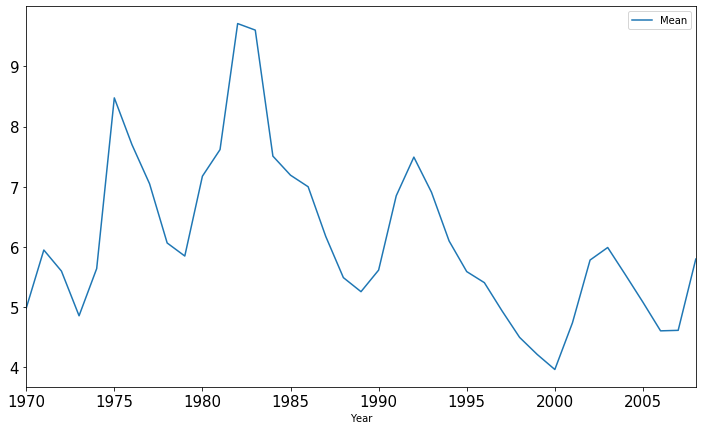

In [3]:
# calculate a mean column
df_UnemploymentRates['Mean']=df_UnemploymentRates.loc[:,'Jan':'Dec'].mean(axis=1)

# make a plot of Mean
df_UnemploymentRates.plot( y='Mean',figsize=(12,7),fontsize=15)

***

### POPULAR MAJORS FROM 1970 TO 2008

In [5]:
# new dataset. built by combining majors from several files by "total"
df_combinedMajors = pd.read_csv('Cogs108_data.csv')

In [6]:

df_combinedMajors = pd.read_csv('Cogs108_data.csv')

# Move the six major we choose to the front of the dataframe
first = ['Social Sciences','Business','English','Engineering','Psychology', 'Biology']
df_combinedMajors = df_combinedMajors[np.r_[first, df_combinedMajors.columns.difference(first)]]

# change index to Year
df_combinedMajors = df_combinedMajors.set_index('Year')
df_combinedMajors.head()

,Social Sciences,Business,English,Engineering,Psychology,Biology,Biomedical,Chemical Engineering,Chemistry,Civil Engineering,...,Mathematics,Mechanical Engineering,Microbiology,Physical Science,Physics,Political science and government,Public Administration,Sociology,Visual and Performing arts,Zoology
Year,,,,,,,,,,,,,,,,,,,,,
1970-71,155324,115396,63914,50182,38187,26294,35683,3579,11061,6526,...,24801,8858,1475,21410,5071,27482,5466,33263,30394,5721
1971-72,158060,121917,63707,51258,43433,27473,37269,3625,10588,6803,...,23713,8530,1548,20743,4634,28135,7508,35216,33831,5518
1972-73,155970,126717,60607,51384,47940,31185,42205,3578,10124,7390,...,23067,8523,1940,20692,4259,30100,10690,35436,36017,5763
1973-74,150320,132304,54190,50412,52139,36188,48224,3399,10430,8017,...,21635,7677,2311,21170,3952,30744,11966,35491,39730,6128
1974-75,135190,133639,47062,47131,51245,38748,51576,3070,10541,7651,...,18181,6890,2767,20770,3706,29126,13661,31488,40782,6110


In [7]:
# keep only the significant years, easier for graphing
df_combinedMajors = df_combinedMajors.rename(index = lambda x : str(x)[:-3])

# we see that 1999-2000 has extra numbers compared to the rest of the years, so manually modify it
df_combinedMajors.rename(index = {"1999-2": "1999"}, inplace = True) 
#df_combinedMajors.index = df_combinedMajors.index.map(int)

In [8]:
# calculate percentage for each cell
df_combinedMajors = df_combinedMajors.apply(lambda x: round((x/x.sum())*100,2), axis=1)

### MAJOR DISTRIBUTION IN 1970

Social Sciences    19.31
Business           14.35
English             7.95
Engineering         6.24
Psychology          4.75
Name: 1970, dtype: float64

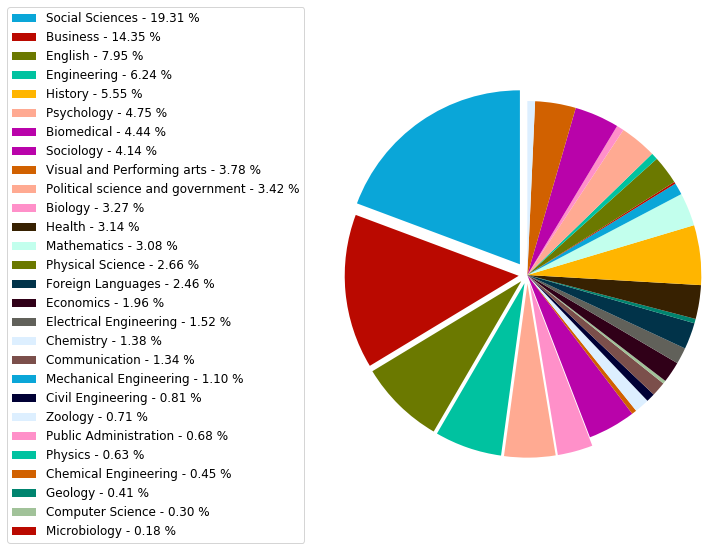

In [9]:
colors = [ "#0AA6D8", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100",
        "#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#61615A", "#013349", "#00846F",
        "#372101", "#FFB500", "#C2FFED"]
x1 = df_combinedMajors.loc['1970']
x2 = list(df_combinedMajors.columns)

#converted to numpy array
year = np.char.array(x2)
value = np.array(x1)
percent = 100.*value/value.sum()

#explode the 6 chosen majors 
explode = (0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

patches, texts = plt.pie(value, colors=colors, startangle=90, radius=2, explode = explode, shadow = False)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(year, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, value), key=lambda year: year[2],reverse=True))
plt.legend(patches, labels, loc='right', bbox_to_anchor=(-0.5, 0.5),
           fontsize=12) 

#plt.pie(x1, labels = x2, radius = 2, autopct = '%0.1f%%', colors = colors, explode = explode, shadow = True)
df_combinedMajors.loc['1970'].head()


### MAJOR DISTRIBUTION IN 2005

Social Sciences    11.64
Business           22.93
English             3.97
Engineering         5.88
Psychology          6.36
Name: 2005, dtype: float64

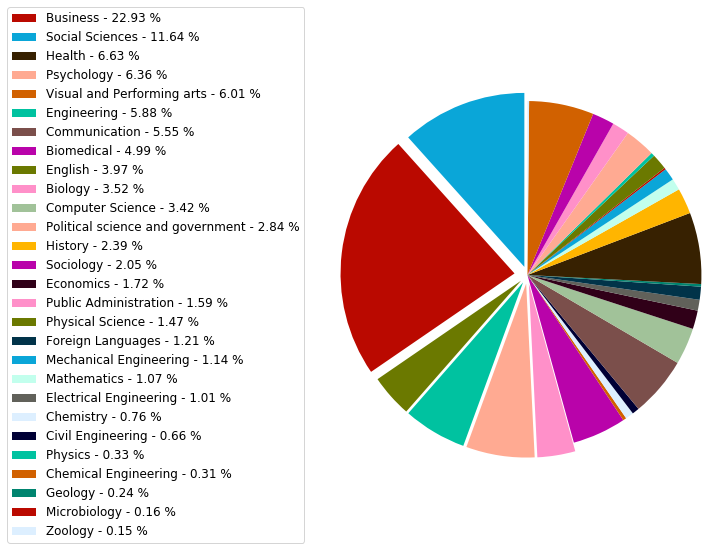

In [10]:
colors = [ "#0AA6D8", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100",
        "#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#61615A", "#013349", "#00846F",
        "#372101", "#FFB500", "#C2FFED"]
x1 = df_combinedMajors.loc['2005']
x2 = list(df_combinedMajors.columns)

#converted to numpy array
year = np.char.array(x2)
value = np.array(x1)
percent = 100.*value/value.sum()

#explode the 6 chosen majors 
explode = (0.1, 0.15, 0.1, 0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

patches, texts = plt.pie(value, colors=colors, startangle=90, radius=2, explode = explode, shadow = False)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(year, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, value), key=lambda year: year[2],reverse=True))
plt.legend(patches, labels, loc='right', bbox_to_anchor=(-0.5, 0.5),
           fontsize=12) 

#plt.pie(x1, labels = x2, radius = 2, autopct = '%0.1f%%', colors = colors, explode = explode, shadow = True)
df_combinedMajors.loc['2005'].head()

***

### GRAPHS OF SIX MAJORS WE CHOOSE TO ANALYZE

###### Below are graphs for
1. Business
2. English
3. Engineering
4. Psychology
5. Biology
6. Social Sciences

In [11]:
# Select the majors we want to filter out
six_majors = df_combinedMajors[['Biology','Business', 'Engineering','English','Psychology','Social Sciences']]
df_matrix = six_majors.copy()
six_majors = six_majors.iloc[::5, :]
six_majors


,Biology,Business,Engineering,English,Psychology,Social Sciences
Year,,,,,,
1970,3.27,14.35,6.24,7.95,4.75,19.31
1975,4.73,16.87,5.50,4.88,5.92,14.89
1980,3.52,22.53,8.47,3.59,4.61,11.29
1985,2.84,24.33,9.98,3.50,4.18,9.65
1990,2.83,24.07,7.70,4.93,5.67,12.09
1995,4.07,20.60,7.10,4.54,6.67,11.50
2000,3.67,22.85,6.33,4.39,6.39,11.10
2005,3.52,22.93,5.88,3.97,6.36,11.64


### Bar Graph of 6 majors popularity 1970 vs. 2005

In [12]:
six_majors_1970vs2005 = six_majors.iloc[::7, :]
six_majors_1970vs2005

,Biology,Business,Engineering,English,Psychology,Social Sciences
Year,,,,,,
1970,3.27,14.35,6.24,7.95,4.75,19.31
2005,3.52,22.93,5.88,3.97,6.36,11.64


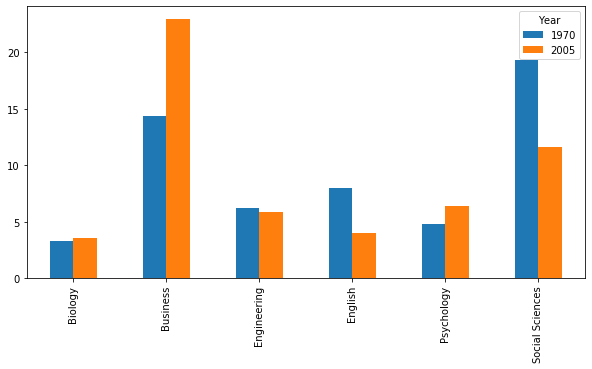

In [13]:
six_majors_1970vs2005.T.plot(kind='bar',figsize=(10,5) )


***

### Graph of 6 majors 1970-2005

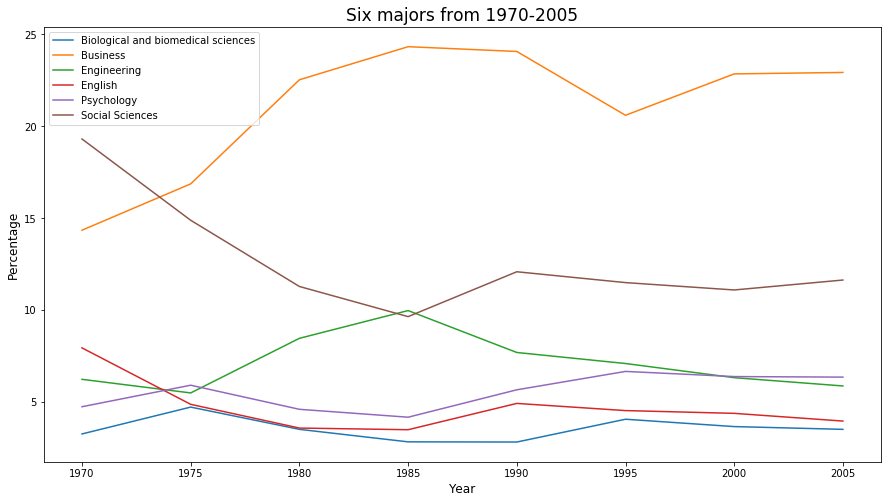

In [14]:
# x values
x = np.arange(1970,2005+1,5)

# extract 6 majors we intended to graph
y1 = six_majors['Biology']
y2 = six_majors['Business']
y3 = six_majors['Engineering']
y4 = six_majors['English']
y5 = six_majors['Psychology']
y6 = six_majors['Social Sciences']

# set larger size for graph
plt.figure(figsize=(15,8))

# now graph them
plt.plot( x, y1, label = 'Biological and biomedical sciences' )
plt.plot( x, y2, label = 'Business' )
plt.plot( x, y3, label = 'Engineering' )
plt.plot( x, y4, label = 'English' )
plt.plot( x, y5, label = 'Psychology' )
plt.plot( x, y6, label = 'Social Sciences' )

# for cosmetics
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title("Six majors from 1970-2005", fontsize=17) 
plt.legend()

***

### Six majors from 1970-2005  vs. Unemployment Rates
Now we want to add unemployment rates into the above graph for further analysis

In [15]:
# Filter out the unemployment rates for every 5 years since 1970
unemploy_rates_5years = df_UnemploymentRates.iloc[::5, :]
unemploy_rates_5years

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Mean
Year,,,,,,,,,,,,,
1970,3.9,4.2,4.4,4.6,4.8,4.9,5.0,5.1,5.4,5.5,5.9,6.1,4.983333
1975,8.1,8.1,8.6,8.8,9.0,8.8,8.6,8.4,8.4,8.4,8.3,8.2,8.475000
1980,6.3,6.3,6.3,6.9,7.5,7.6,7.8,7.7,7.5,7.5,7.5,7.2,7.175000
1985,7.3,7.2,7.2,7.3,7.2,7.4,7.4,7.1,7.1,7.1,7.0,7.0,7.191667
1990,5.4,5.3,5.2,5.4,5.4,5.2,5.5,5.7,5.9,5.9,6.2,6.3,5.616667
1995,5.6,5.4,5.4,5.8,5.6,5.6,5.7,5.7,5.6,5.5,5.6,5.6,5.591667
2000,4.0,4.1,4.0,3.8,4.0,4.0,4.0,4.1,3.9,3.9,3.9,3.9,3.966667
2005,5.3,5.4,5.2,5.2,5.1,5.0,5.0,4.9,5.0,5.0,5.0,4.9,5.083333


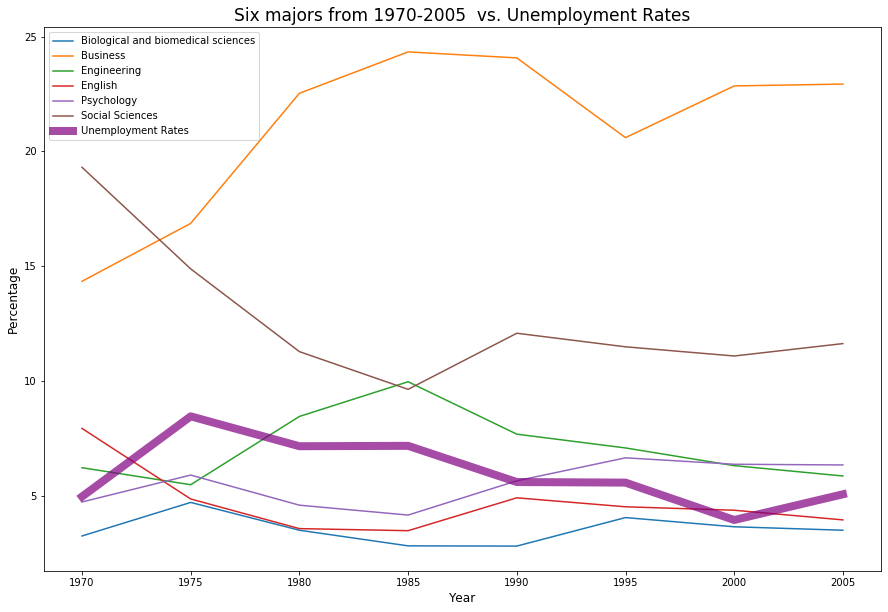

In [16]:
# get the array of mean in unemployment rates table. Data is every 5 years since 1970 to 2005
y7 = unemploy_rates_5years['Mean']

# set larger size for graph
plt.figure(figsize=(15,10))

# now graph them
plt.plot( x, y1, label = 'Biological and biomedical sciences' )
plt.plot( x, y2, label = 'Business' )
plt.plot( x, y3, label = 'Engineering' )
plt.plot( x, y4, label = 'English' )
plt.plot( x, y5, label = 'Psychology' )
plt.plot( x, y6, label = 'Social Sciences' )
plt.plot( x, y7, label = 'Unemployment Rates', marker='', linewidth=8, alpha=0.7,color= 'purple' )

# For cosmetics
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title("Six majors from 1970-2005  vs. Unemployment Rates", fontsize=17)
plt.legend()
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']


***

### SCATTER MATRIX OF SIX MAJORS (1970-2005)

In [17]:
df_matrix
df_UnemploymentRates['Mean'].values
df_matrix = df_matrix.assign(UnemploymentRates = df_UnemploymentRates['Mean'].values)
df_matrix.head()

,Biology,Business,Engineering,English,Psychology,Social Sciences,UnemploymentRates
Year,,,,,,,
1970,3.27,14.35,6.24,7.95,4.75,19.31,4.983333
1971,3.30,14.67,6.17,7.66,5.22,19.01,5.950000
1972,3.64,14.79,6.00,7.07,5.59,18.20,5.600000
1973,4.13,15.11,5.76,6.19,5.95,17.17,4.858333
1974,4.55,15.71,5.54,5.53,6.02,15.89,5.641667


### Correlation Dataframe

In [24]:
#convert the data to instantaneous rate
df_corr = np.log(df_matrix).diff()
df_corr = df_corr[1:]
df_corr.head()

,Biology,Business,Engineering,English,Psychology,Social Sciences,UnemploymentRates
Year,,,,,,,
1971,0.009132,0.022055,-0.011281,-0.037160,0.094353,-0.015658,0.177292
1972,0.098061,0.008147,-0.027939,-0.080152,0.068482,-0.043544,-0.060625
1973,0.126294,0.021405,-0.040822,-0.132925,0.062412,-0.058258,-0.142071
1974,0.096850,0.038941,-0.038943,-0.112747,0.011696,-0.077474,0.149484
1975,0.038798,0.071239,-0.007246,-0.125043,-0.016751,-0.065000,0.406941


### Scatter Matrix Between Six Majors and Unemployment Rate

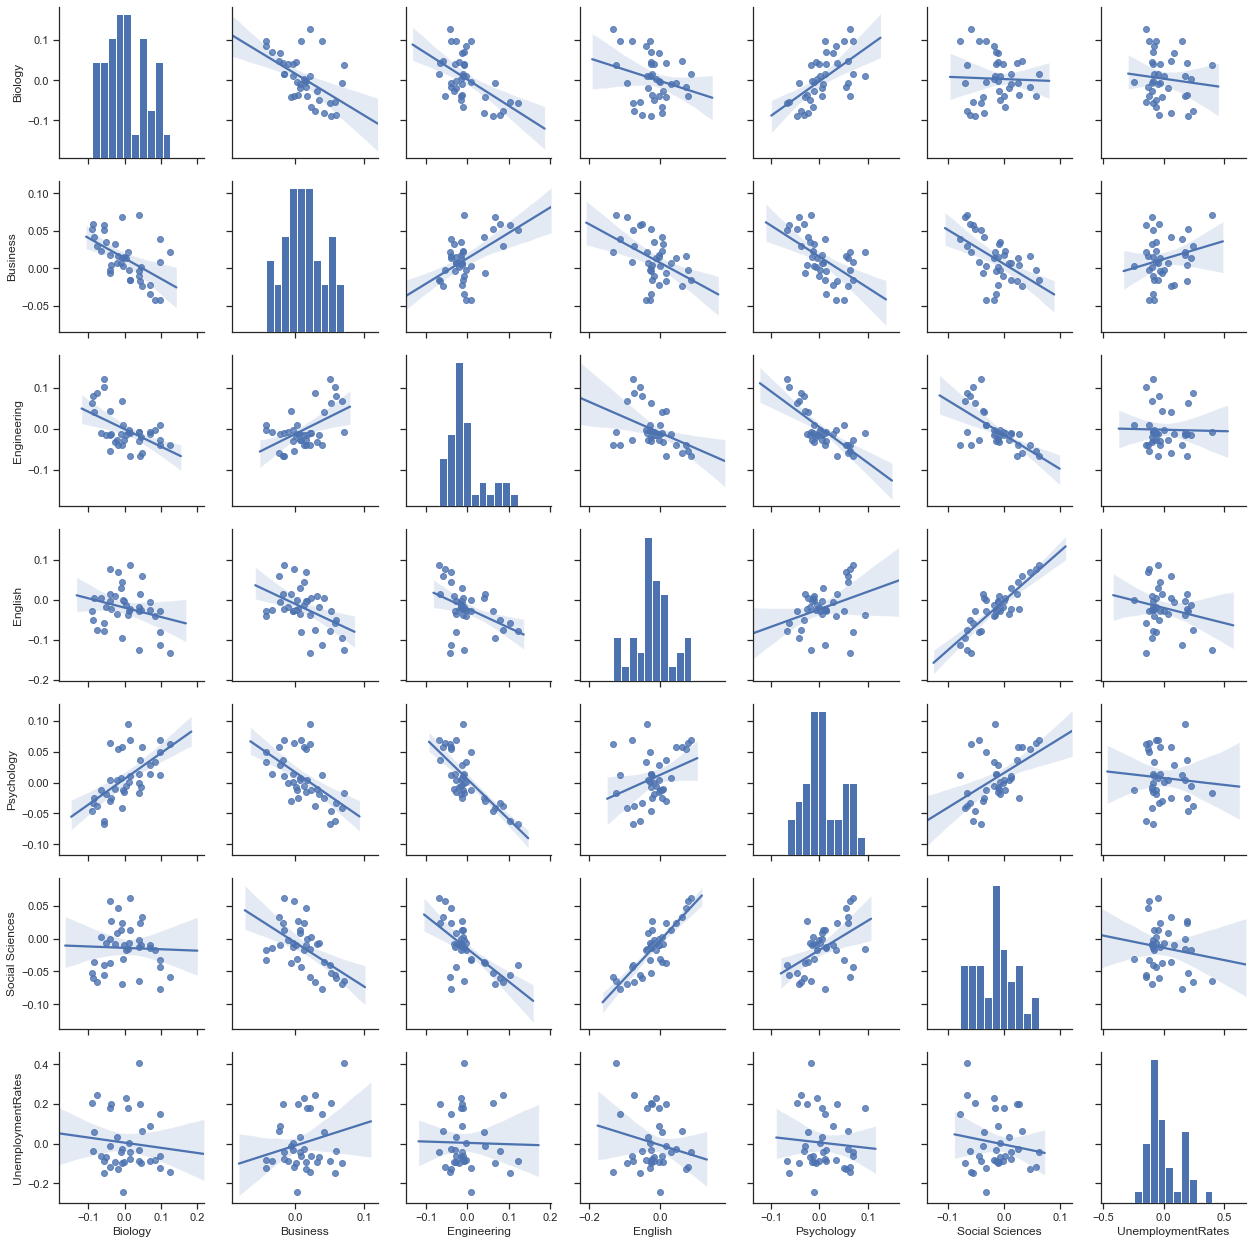

In [22]:
#Scatter Matrix with regression line
sns.set(style = "ticks", color_codes = True)
sns.pairplot(df_corr, kind ='reg')

### Bar graph of 6 Majors Expected Income

Undergraduate Major,Biology,Business Management,Computer Engineering,English,Psychology,Sociology
Starting Median Salary,38800,43000,61400,38000,35900,36500
Mid-Career Median Salary,64800,72100,105000,64700,60400,58200


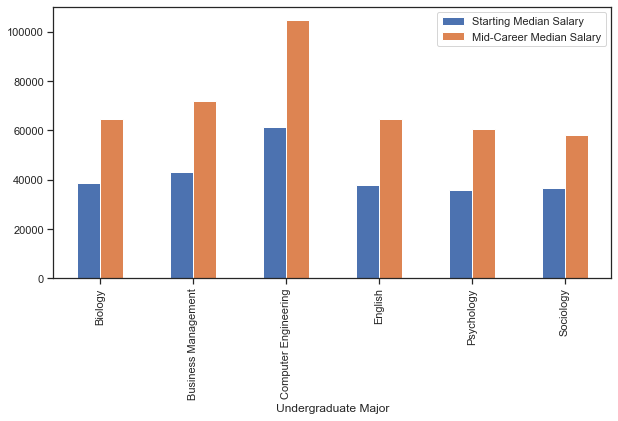

In [23]:
# import dataset for expected income 
df_income = pd.read_csv('degrees-that-pay-back.csv')
df_income.dropna()
df_income = df_income.iloc[:,0:3]

#Convert String to float of the Starting Median Salary
df_income['Starting Median Salary'] = df_income['Starting Median Salary'].str.replace('$','')
df_income['Starting Median Salary'] = df_income['Starting Median Salary'].str.replace(',','')
df_income['Starting Median Salary'] = df_income['Starting Median Salary'].astype(float)

df_income['Mid-Career Median Salary'] = df_income['Mid-Career Median Salary'].str.replace('$','')
df_income['Mid-Career Median Salary'] = df_income['Mid-Career Median Salary'].str.replace(',','')
df_income['Mid-Career Median Salary'] = df_income['Mid-Career Median Salary'].astype(float)

df_income = df_income.T

df_income.columns = df_income.iloc[0]
df_income = df_income.drop(df_income.index[0])
df_income = df_income[['Biology', 'Business Management', 'Computer Engineering', 'English', 'Psychology', 'Sociology']]

df_income.T.plot(kind='bar', figsize=(10,5))
df_income

### Assess significance: mod_1

Looking at the significance between Business and Unemployment rate and using the alpha value of 0.01 we can see that the correlation shows that there is not a significant difference between the number of people that major in Business and the Unemployment rate from 1970 to 2005


In [27]:
outcome_1, predictors_1 = patsy.dmatrices('Business ~ UnemploymentRates', df_matrix)

mod_1 = sm.OLS(outcome_1, predictors_1)

res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:               Business   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.7195
Date:                Thu, 12 Dec 2019   Prob (F-statistic):              0.402
Time:                        15:51:49   Log-Likelihood:                -99.332
No. Observations:                  39   AIC:                             202.7
Df Residuals:                      37   BIC:                             206.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            19.5944      2.37

### Assess significance: mod_2

Looking at the prediction between Engineering, Business, Biology, Pyschology, and English from Unemployment rate and using the alpha value of 0.01 we can see that the correlation shows that there is a significant difference between the number of people that major in Engineering and the Unemployment rate from 1970 to 2005

In [28]:
outcome_2, predictors_2 = patsy.dmatrices('UnemploymentRates ~ Biology + Business + Engineering + English + Psychology', df_matrix)

mod_2 = sm.OLS(outcome_2, predictors_2)

res_2 = mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:      UnemploymentRates   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     5.550
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           0.000813
Time:                        15:51:49   Log-Likelihood:                -54.889
No. Observations:                  39   AIC:                             121.8
Df Residuals:                      33   BIC:                             131.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      17.6863     13.138      1.346      

### Assess significance: mod_3

Looking at the predictions for starting median salary and mid-career median salary we saw that there is a correlation between higher starting median salaries and mid-career median salaries across our dataframe for undergraduate majors, therefore the regression model shows there is high probability of a major with a higher starting median salary earning a higher mid-career median salary compared to majors that start out at lower starting median salaries which is what we wanted to predic.

In [29]:
df_income = pd.read_csv('degrees-that-pay-back.csv')
df_income.dropna()
df_income = df_income[['Undergraduate Major', 'Starting Median Salary', 'Mid-Career Median Salary']]

df_income['Starting Median Salary'] = df_income['Starting Median Salary'].str.replace('$','')
df_income['Starting Median Salary'] = df_income['Starting Median Salary'].str.replace(',','')
df_income['Starting Median Salary'] = df_income['Starting Median Salary'].astype(float)

df_income['Mid-Career Median Salary'] = df_income['Mid-Career Median Salary'].str.replace('$','')
df_income['Mid-Career Median Salary'] = df_income['Mid-Career Median Salary'].str.replace(',','')
df_income['Mid-Career Median Salary'] = df_income['Mid-Career Median Salary'].astype(float)

df_income['SMS'] = df_income['Starting Median Salary']
df_income['MMS'] = df_income['Mid-Career Median Salary']
df_income['UG'] = df_income['Undergraduate Major']

df_income = df_income.drop(df_income.index[0])

outcome_1, predictors_1 = patsy.dmatrices('SMS ~ MMS', df_income)

mod_1 = sm.OLS(outcome_1, predictors_1)

res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    SMS   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     120.7
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           1.41e-14
Time:                        15:51:49   Log-Likelihood:                -486.42
No. Observations:                  49   AIC:                             976.8
Df Residuals:                      47   BIC:                             980.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7387.3122   3434.371      2.151      0.0

***

# Ethics & Privacy

We are using datasets pulled from the National Center for Education Statistics (NCES). NCES is under the U.S. Department of Education, all published government data is free for public use. We are relying on NCES/U.S.ED data collection standards to ensure privacy. The non-NCES datasets have Creative Commons license allowing us to use it to share and adapt the data. None of the data we are looking at exposes personally identifiable information, so all safe harbor requirements were met in our data.

There is a potential for human bias in our manipulation of the data, because we hand selected three STEM and three non-STEM fields to measure the impact of economics on enrollment. To be truly impartial, we should have implemented a random selection of majors. The impacts of this decision will be discussed further in our conclusion and analysis of data.

The data we used for major popularity was from students receiving title IV a federal financial aid program. This represents a relatively homogenous group, not necessarily representative of the entire population. We decided that this data was still relevant because the large time range can still show trends over the years.

Because we chose to model the state of the economy by unemployment averages, there is a potential for unequitable impact. It is likely that those in higher socioeconomic groups experience more freedom when selecting majors and careers, and lower unemployment rates, which we do not account for.

Despite these issues, we have created an ethical assignment that attempts to answer important questions about the value of education and the decisions individuals make about their future careers.




***

# Conclusion & Discussion

We are comparing unemployment rates and students enrollment by major to see if there is a correlation between these. We will be comparing these data sets to determine if unemployment rates influence major selection.  We have narrowed the analysis of majors down to what we thought were 6 representative majors. Three representing STEM oriented majors, and three representing Liberal Arts majors. Our analysis has shown that there is a weak correlation between major choices and unemployment rate. There are a few factors that we feel would be important to consider for further/future studies. The majors selected may not have been the best representative majors. We would ideally like to look at numbers of people applying to the selected majors, rather than actual enrollment. We think the data does show that there may be a slightly delayed response between unemployment and major enrollment.

Our analysis has shown that there is a weak correlation between major choices and unemployment rate. There are a few factors that we feel would be important to consider for further/future studies. There Are three major takeaways: 1) The majors selected may not have been the best representative majors. 2) We would ideally like to look at numbers of people applying to the selected majors, rather than actual enrollment. 3) We think the data does show that there may be a slightly delay between unemployment and major enrollment.


